### Contrast and Brightness with GAMA

$$O = \left( \frac{I}{255} \right)^{\gamma} \times 255$$


#### bright 
$$\gamma < 1$$
#### dark
$$\gamma > 1$$


#### underexposed image

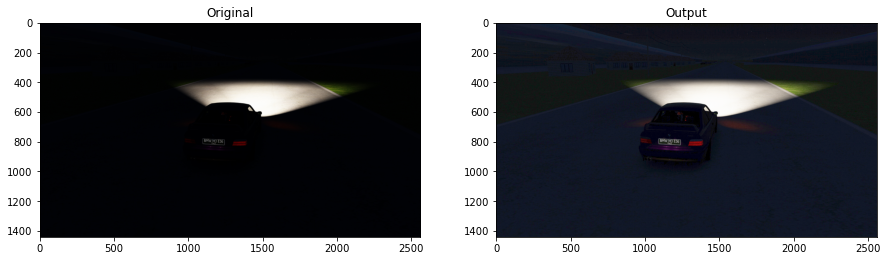

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5

img_original = cv2.imread("images/dark6.jpg")
lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
out = cv2.LUT(img_original, lookUpTable)


plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(img_original[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(out[...,::-1]);plt.title("Output");

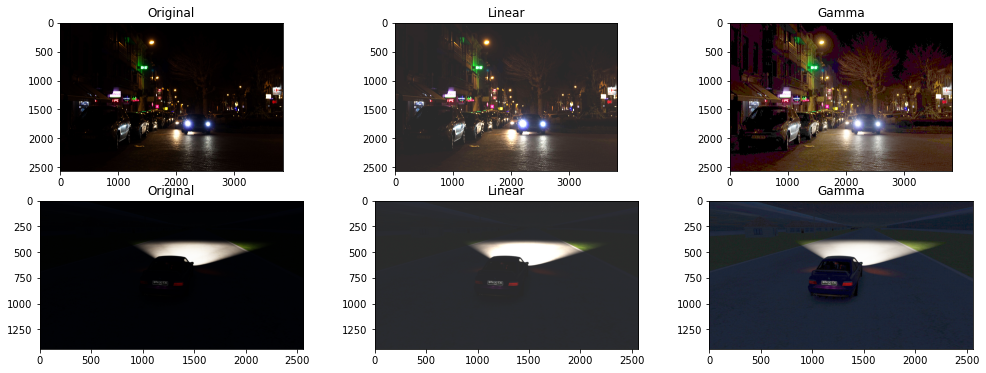

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.4

img_original1 = cv2.imread("images/dark3.jpg")
img_original2 = cv2.imread("images/dark6.jpg")
output_linear1 = cv2.convertScaleAbs(img_original1, alpha=1.3, beta=40)
output_linear2 = cv2.convertScaleAbs(img_original2, alpha=1.3, beta=40)

lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
output_gammacorrected1 = cv2.LUT(img_original1, lookUpTable)
output_gammacorrected2 = cv2.LUT(img_original2, lookUpTable)


plt.figure(figsize=[17,6])
plt.subplot(231);plt.imshow(img_original1[...,::-1]);plt.title("Original");
plt.subplot(232);plt.imshow(output_linear1[...,::-1]);plt.title("Linear");
plt.subplot(233);plt.imshow(output_gammacorrected1[...,::-1]);plt.title("Gamma");

plt.subplot(234);plt.imshow(img_original2[...,::-1]);plt.title("Original");
plt.subplot(235);plt.imshow(output_linear2[...,::-1]);plt.title("Linear");
plt.subplot(236);plt.imshow(output_gammacorrected2[...,::-1]);plt.title("Gamma");